**Objetivo**: Vamos a estudiar la órbita osculatriz de los asteroides cercanos a la Tierra o NEAs y su descripción en términos del CRTBP.


In [1]:
from proofs.prover import Prover
from graphics.canvas import Canvas
from neas.nea import NEA
from neas.eccentricity import tisserand
from IPython.display import display
import numpy as np
import pandas as pd

**Procedimiento**:

1. En principio, un asteroide se considera *cercano a la Tierra* (o NEA, por su sigla en inglés, *Near Earth Asteroid*) si su órbita puede cruzar la órbita de la Tierra. Demuestre que para que la órbita de un asteroide cumpla está condición se debe dar que $q<Q_\oplus$  y que $Q>q_\oplus$, donde $q$ y $Q$ son las distancias al periapsis y al apoapsis de un cuerpo en una órbita.

In [2]:
prover = Prover()
prover.nPi()

Let $Q_{NEA}$ be the aphelion and $q_{NEA}$ the perihelion distances of the asteroid, while $Q_{E}$ and $q_{E}$ are the aphelion and perihelion distances of the Earth, respectively.

These numbers are solutions to the equation:

$$r(n) = \frac{a(1-e^{2})}{1+e\cos(n\pi)},$$

where $a$ is the semi-major axis, $e$ the eccentricity, for $n \in \{0,1\}$.

Hence, for $n = 0$, the perihelion distance for $q_{NEA}$ and $q_{E}$ is:

$$q_{NEA} = a(1-e), \quad q_{E} = a_{E}(1-e_{E}),$$

where $a_{E}$ and $e_{E}$ are the semi-major axis and eccentricity of the Earth's orbit.

Similarly, for $n = 1$, the aphelion distance for $Q_{NEA}$ and $Q_{E}$ is:

$$Q_{NEA} = a(1+e), \quad Q_{E} = a_{E}(1+e_{E}).$$

Since the condition for a minor solar system body to be classified as a NEA implies that the body's orbit must have an interception point with the Earth's orbit, this necessarily means that the perihelion and aphelion distances of the body serve as lower and upper bounds for the semi-major axis of the Earth's orbit.

So, the condition for a minor solar system body to be classified as a NEA is given by the inequality:

$$q_{NEA} < r_{E} < Q_{NEA},$$

where $r_{E}$ is the semi-major axis of the Earth's orbit.

However, Earth's orbit is not circular, and it has its own intrinsic bounds for the semi-major axis, which are given by the inequality:

$$q_{E} \leq r_{E} \leq Q_{E}.$$

Then, what is needed is that the interception between these two intervals is not empty, and such a condition is met when the inequality:

$$\max(q_{NEA}, q_{E}) \leq \min(Q_{NEA}, Q_{E})$$

is satisfied.

Applied to the asteroid case, its aphelion distance is, in general, greater than the Earth's aphelion distance. Hence, for an interception to happen, the Earth's aphelion distance must be greater than the asteroid's perihelion distance. Otherwise, the asteroid's greatest approach to the Sun would never reach the interior of the Earth's orbit.

Thus, the condition for a minor solar system body to be classified as a NEA is given by the inequality:

$$q_{NEA} < Q_{E}.$$

Similarly, for the less common case where the asteroid's aphelion distance is less than the Earth's aphelion distance, the inequality is reversed, leading to the condition:

$$Q_{NEA} > q_{E}.$$

Hence, arriving at the relations that must be met.


2. Haga un gráfico en el plano $e$-$a$ (estando $e$, la excentricidad en el eje y, y $a$ el semiejemayor en el eje x). Que muestre las órbitas para las cuáles $q=Q_\oplus$, $Q=q_\oplus$ y que haga un sombreado de las órbitas que cumplen la condición de cruzar la órbita de la Tierra.

Para $q = Q_{\oplus}$:

$$
Q_{\oplus} = a(1 - e) = 1.017 \Rightarrow e = 1 - \frac{1.017}{a}
$$

Para $Q = q_{\oplus}$:

$$
Q = q_{\oplus} = a(1 + e) = 0.983 \Rightarrow e = \frac{0.983}{a} - 1
$$


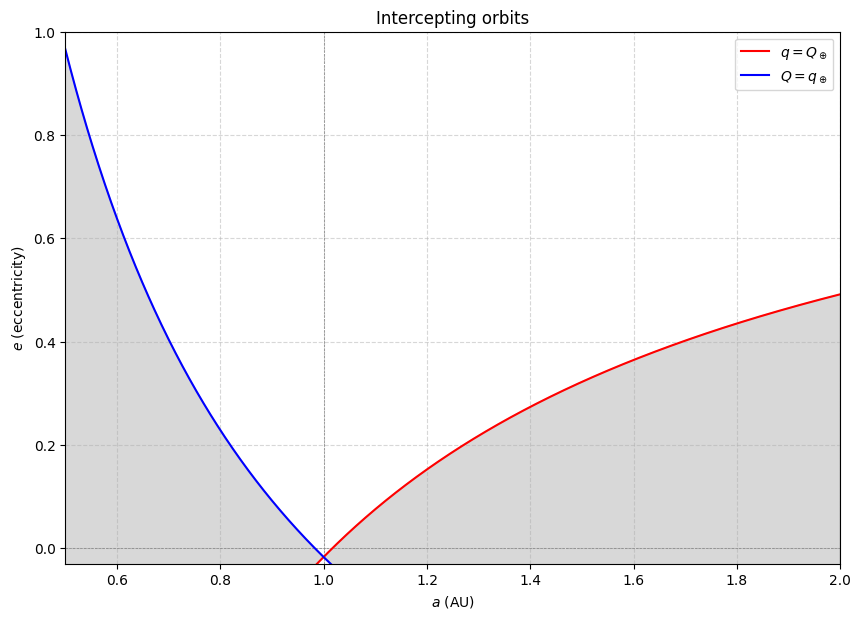

In [3]:
a = np.linspace(0.5, 2, 1000)
e_q_QE = 1 - 1.017 / a  # q = Q_⊕
e_Q_qE = 0.983 / a - 1  # Q = q_⊕

c = Canvas()

c.fill(bounds=(e_q_QE, e_Q_qE),
       bounds_names=(r'$q = Q_\oplus$', r'$Q = q_\oplus$'), 
       x_range=a, colors=('red', 'blue'))

3. Una condición dinámica más precisa para definir cuando un asteroide es una NEA, consiste tiene que ver con la constante de Jacobi o equivalentemente con el parámetro de Tisserand asociado al sistema Sol-Tierra:

  $$
  T \equiv \frac{a_\oplus}{a}+2 \cos i \sqrt{\left(\frac{a}{a_\oplus}\right)\left(1-e^2\right)}
  $$
  o en términos del $a$ relativo del asteroide, $\bar{a}=a/a_\oplus$
  $$
  T \equiv \frac{1}{\bar{a}}+2 \cos i \sqrt{\bar{a}\left(1-e^2\right)}
  $$

  Demuestre que para asteroides con inclinación orbital $i=0$ la excentricidad de la órbita de los asteroides que tienen constante de Tisserand constante, $T$, cumple:

  $$
  e=\sqrt{1-\frac{1}{4 \bar{a}^3 \cos ^2 i}(T \bar{a}-1)^2}
  $$

In [4]:
prover.tisserand()

So, it is needed to get to an expression of the eccentricity of asteroids parameterized by
inclination (i) equals zero, and constant Tisserand parameter. Hence, coplanar with the solar 
system invariant plane asteroids with a given Tisserand constant.

$$
e = \sqrt{1 - \frac{1}{4 \bar{a}^3 \cos^2 i} (T \bar{a} - 1)^2}
$$

The Tisserand parameter for the Sun-Earth system is:

$$
T = \frac{1}{\bar{a}} + 2 \cos i \sqrt{\frac{\bar{a}}{1 - e^2}}
$$

where \(\bar{a} = \frac{a}{a_\oplus}\) corresponds to the semi-major axis relative to Earth's orbit, \(e\) is the eccentricity, and \(i\) is the orbital inclination. Taking \(i = 0\), the expression simplifies to:

$$
T = \frac{1}{\bar{a}} + 2 \sqrt{\frac{\bar{a}}{1 - e^2}}
$$

Reversing the equation to get the expression for the eccentricity values, and simplifying:

$$
T - \frac{1}{\bar{a}} = 2 \sqrt{\frac{\bar{a}}{1 - e^2}}
$$


$$
\frac{T \bar{a} - 1}{2} = \sqrt{\frac{\bar{a}^3}{1 - e^2}}
$$


$$
\left(\frac{T \bar{a} - 1}{2}\right)^2 = \frac{\bar{a}^3}{1 - e^2}
$$

Inverting the right-hand side:

$$
1 - e^2 = \frac{4 \bar{a}^3}{(T \bar{a} - 1)^2}
$$

Solving for \(e\), we get:

$$
e^2 = 1 - \frac{4 \bar{a}^3}{(T \bar{a} - 1)^2}
$$

$$
e = \sqrt{1 - \frac{1}{4 \bar{a}^3} (T \bar{a} - 1)^2}
$$

Hence, arriving to the expression for the special case of $i = 0$


4. Haga un gráfico en el diagrama $e-a$ que hizo en 2 mostrando la ubicación en el diagrama de las curvas definidas por la ecuación en 3, cuando $T=2.5, 3.0, 3.5$. Compare las curvas resultantes con las que obtuvo en el punto 2. ¿Qué observa?

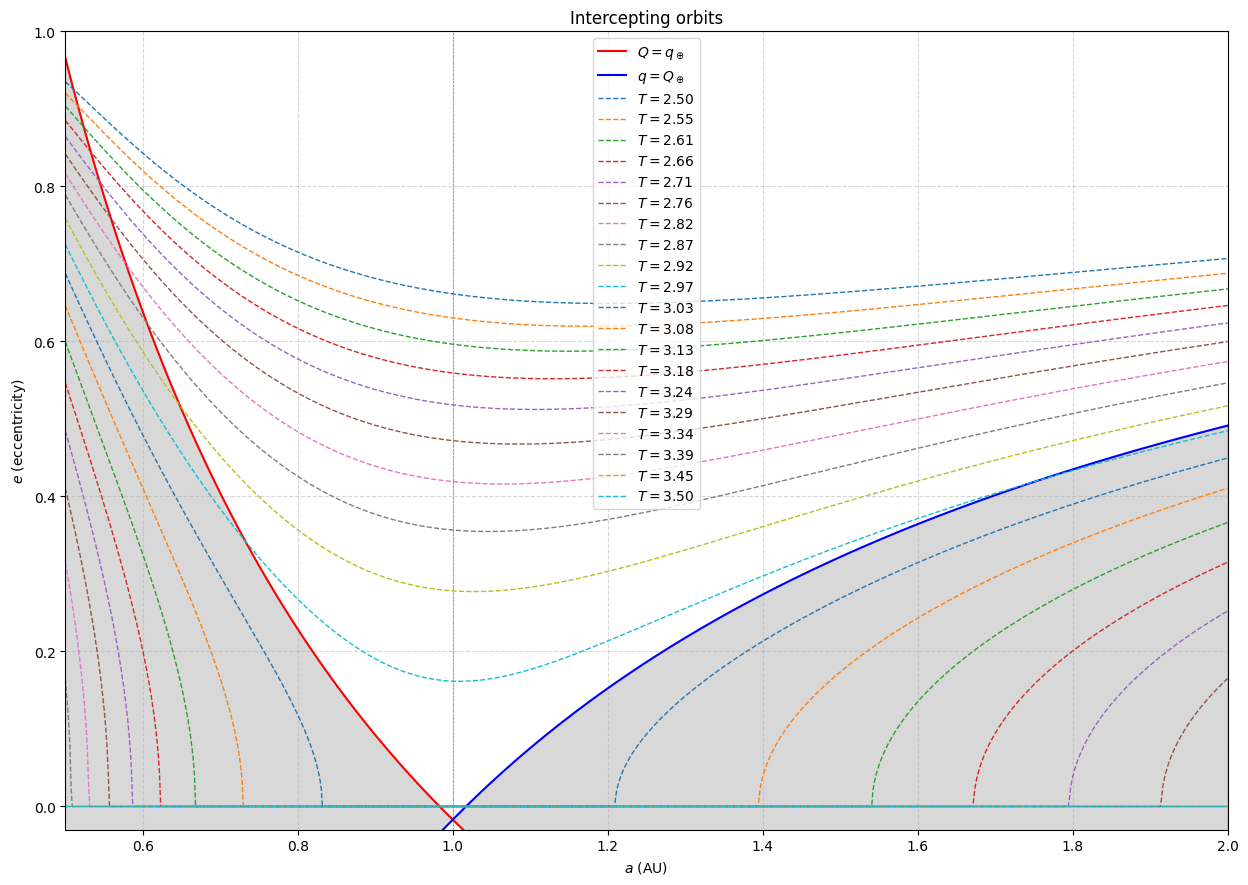

In [5]:
a = np.linspace(0.5, 2, 1000)

e_q_QE = 1 - 1.017 / a  # q = Q_⊕
e_Q_qE = 0.983 / a - 1  # Q = q_⊕

c = Canvas(width=15, height=15)

c.fill(bounds=(e_Q_qE, e_q_QE), bounds_names=(r'$Q = q_\oplus$', r'$q = Q_\oplus$'), 
       x_range=a, colors=('red', 'blue'), alpha=0.3)

for T in np.linspace(2.5, 3.5, 20):
    c.plot(a, tisserand(a, T, i=0), label=f'$T = {T:.2f}$')



5. En el archivo que encontrarán [este enlace](https://drive.google.com/file/d/1jKxVp8v-q4G11UVpy6wtoPYyv6VKNSLr/view?usp=sharing) están los elementos osculantes de más de 37000 NEAs conocidas.  Calcule para cada asteroide el parámetro de Tisserand. Dibuje la ubicación de estos asteroides en el diagrama $e-a$ incluyendo las curvas calculadas en 2 y 5. ¿Qué observa?.

In [6]:
df = pd.read_csv('neas/catalog.csv')
df.head()

,spkid,full_name,epoch_mjd,a,e,i,om,w,ma
0,20000433,433 Eros (A898 PA),60800,1.458,0.2227,10.83,304.27,178.92,198.60
1,20000719,719 Albert (A911 TB),60800,2.636,0.5467,11.57,183.86,156.20,194.53
2,20000887,887 Alinda (A918 AA),60800,2.473,0.5712,9.40,110.41,350.52,30.88
3,20001036,1036 Ganymed (A924 UB),60800,2.666,0.5330,26.68,215.48,132.50,52.27
4,20001221,1221 Amor (1932 EA1),60800,1.920,0.4346,11.87,171.24,26.76,345.77


In [7]:
neas = [NEA({'a': df['a'][i],
             'e': df['e'][i],
             'i': df['i'][i],
             'id': df['spkid'][i],
             'name':df['full_name'][i]})
             for i in range(df.shape[0])]


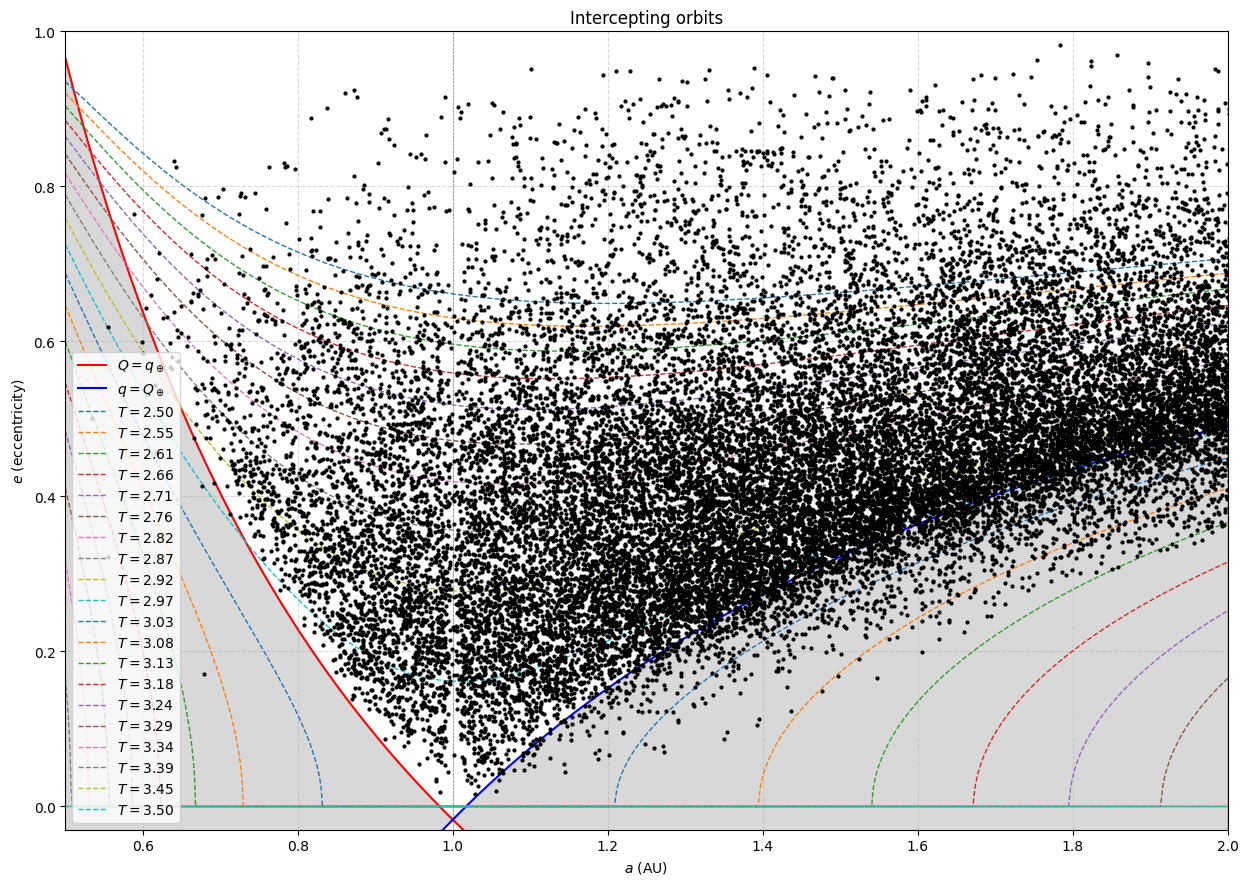

In [8]:
c = Canvas(width=15, height=15)

c.fill(bounds=(e_Q_qE, e_q_QE), bounds_names=(r'$Q = q_\oplus$', r'$q = Q_\oplus$'), 
       x_range=a, colors=('red', 'blue'), alpha=0.3)

for T in np.linspace(2.5, 3.5, 20):
    c.plot(a, tisserand(a, T, i=0), label=f'$T = {T:.2f}$')

for nea in neas:
    c.plot(nea.a, tisserand(nea.a, nea.tisserand, nea.i), real_data=True)